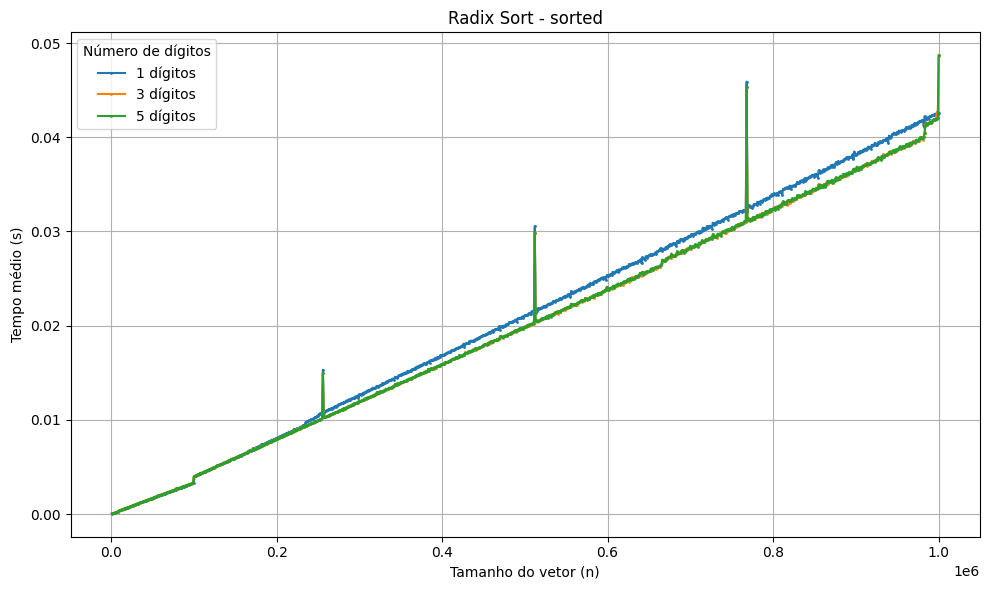

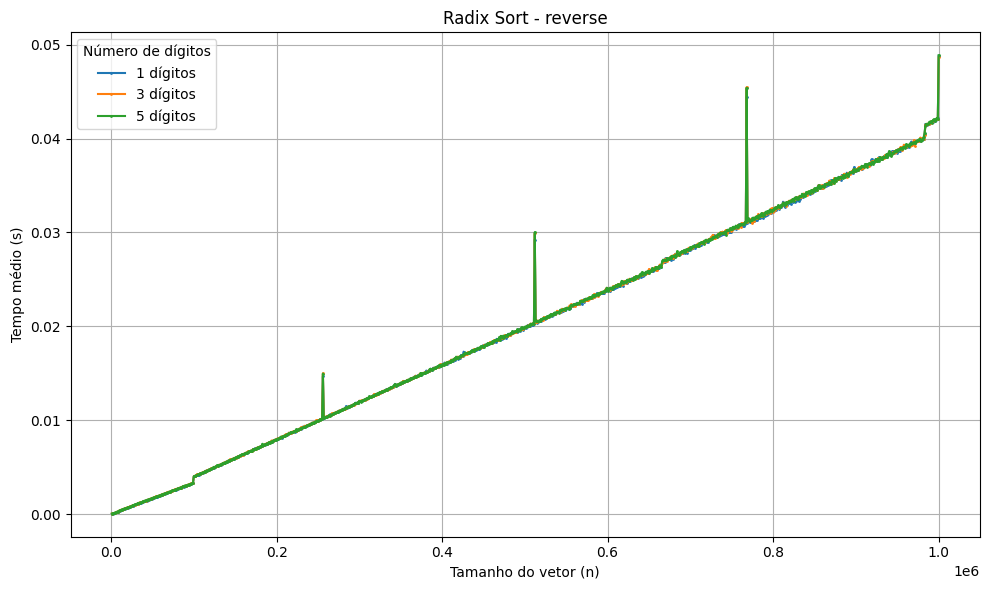

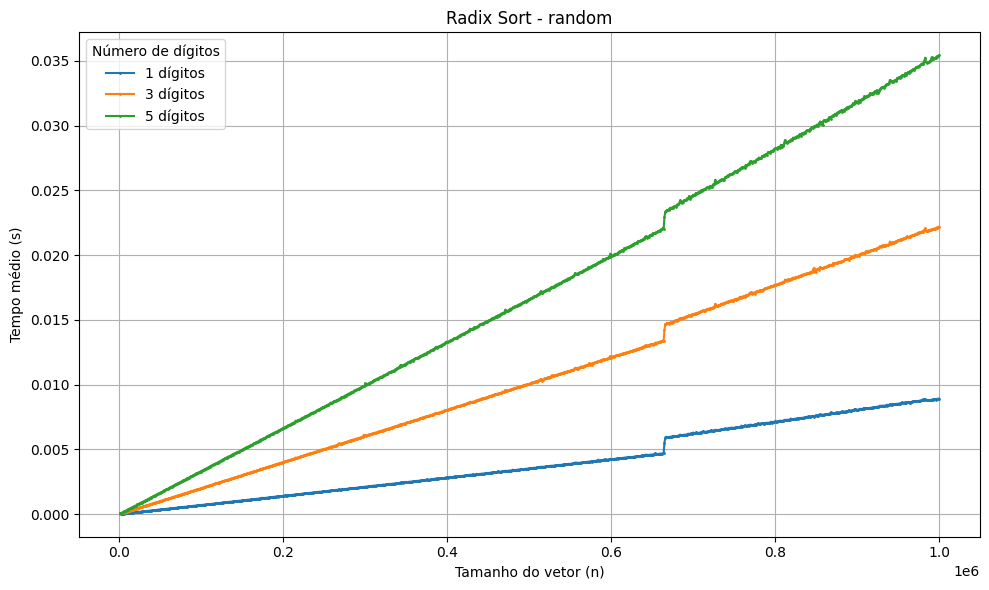

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

scenarios = ["sorted", "reverse", "random"]
dfs = [pd.read_csv(f"{sc}.csv") for sc in scenarios]

data = pd.concat(dfs, ignore_index=True)

grouped = data.groupby(
    ["algorithm", "scenario", "size", "digits"], as_index=False
).agg({
    "execution_time": "mean",
    "memory_used_bytes": "mean"
})

grouped = grouped[grouped["algorithm"] == "radix_sort"]

for scenario in scenarios:
    df_scenario = grouped[grouped["scenario"] == scenario]

    plt.figure(figsize=(10, 6))

    for digits in sorted(df_scenario["digits"].unique()):
        df_d = df_scenario[df_scenario["digits"] == digits]

        plt.plot(
            df_d["size"],
            df_d["execution_time"],
            marker="o",
            markersize=1,
            linewidth=1.5,
            label=f"{digits} dígitos"
        )

    plt.title(f"Radix Sort - {scenario}")
    plt.xlabel("Tamanho do vetor (n)")
    plt.ylabel("Tempo médio (s)")
    plt.legend(title="Número de dígitos")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

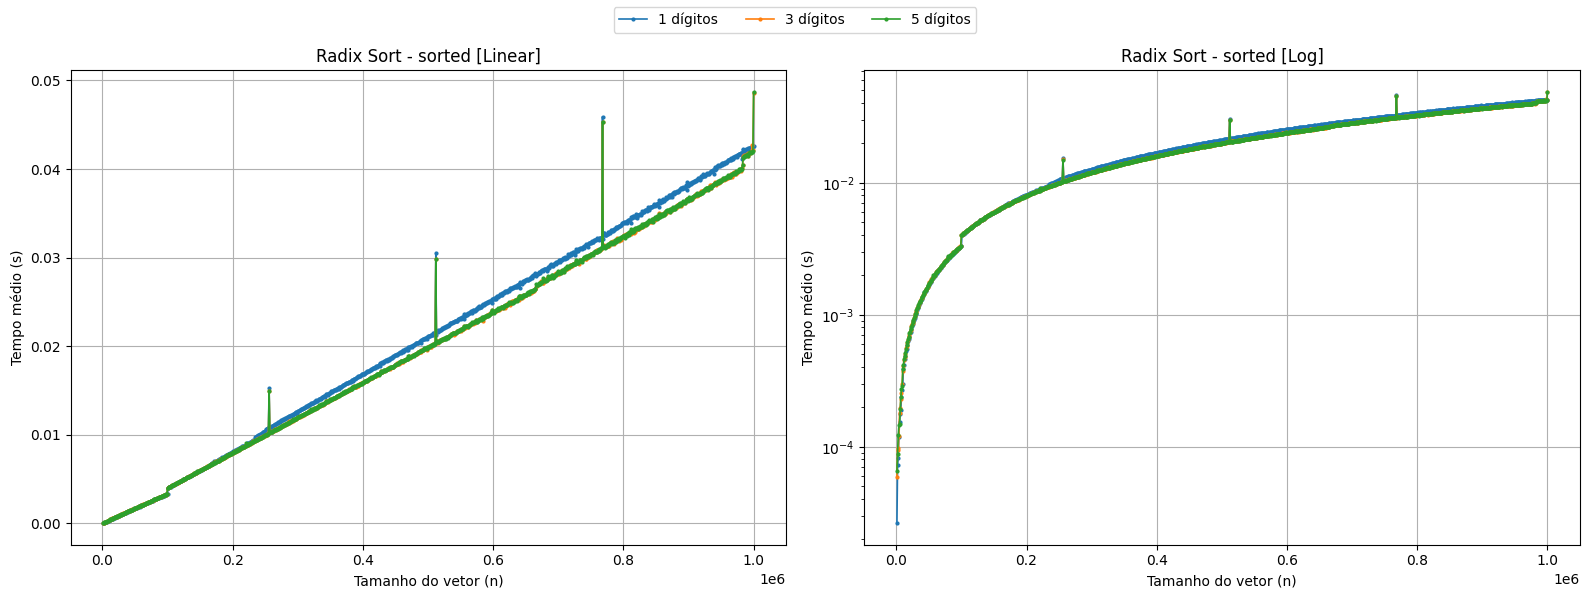

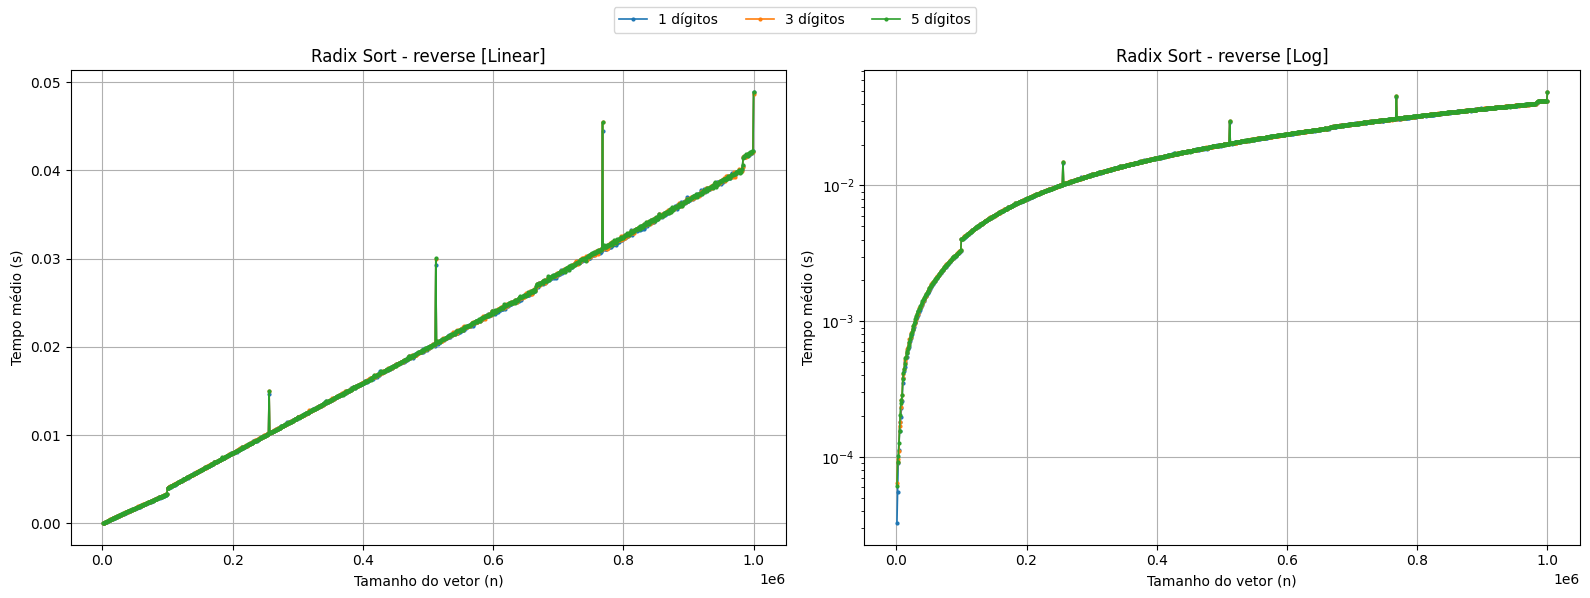

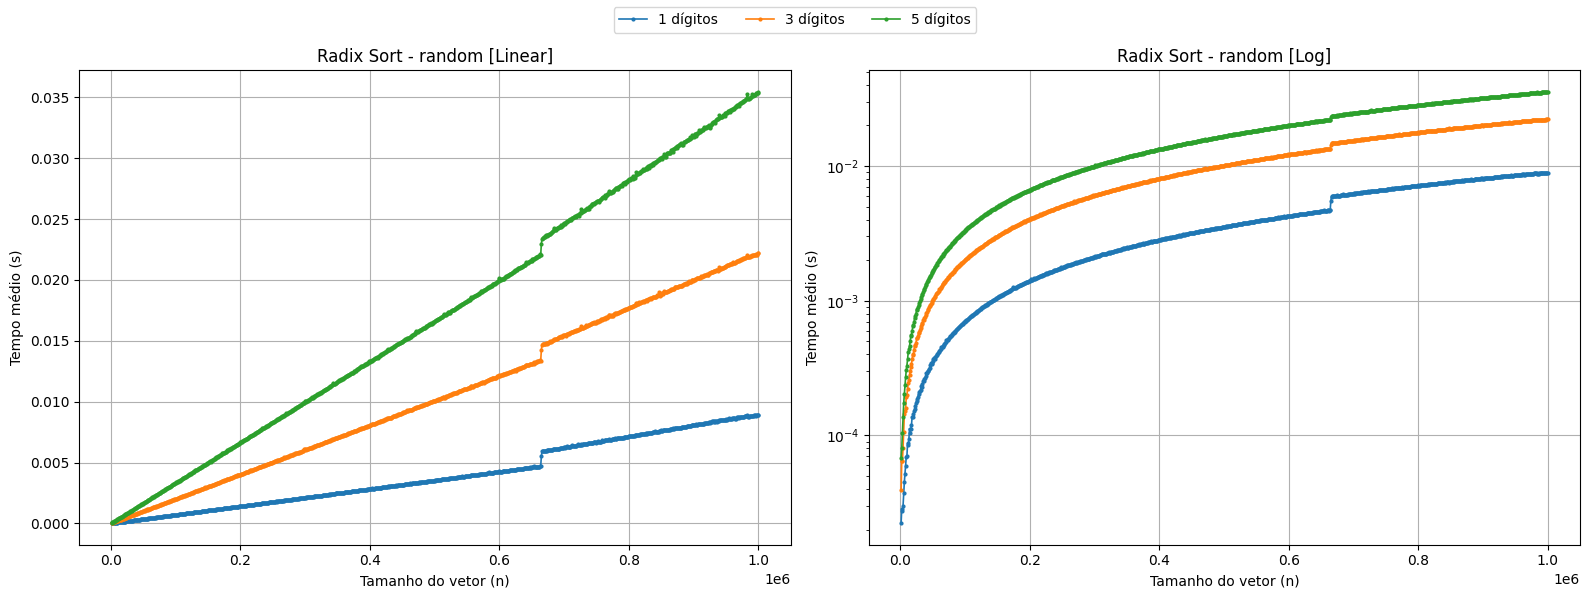

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

scenarios = ["sorted", "reverse", "random"]
dfs = [pd.read_csv(f"{sc}.csv") for sc in scenarios]

data = pd.concat(dfs, ignore_index=True)

grouped = data.groupby(
    ["algorithm", "scenario", "size", "digits"], as_index=False
).agg({
    "execution_time": "mean",
    "memory_used_bytes": "mean"
})

grouped = grouped[grouped["algorithm"] == "radix_sort"]

for scenario in scenarios:
    df_scenario = grouped[grouped["scenario"] == scenario]

    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=False)

    for digits in sorted(df_scenario["digits"].unique()):
        df_d = df_scenario[df_scenario["digits"] == digits]

        for ax in axes:
            ax.plot(
                df_d["size"],
                df_d["execution_time"],
                marker="o",
                markersize=2,
                linewidth=1.2,
                label=f"{digits} dígitos"
            )

    axes[0].set_title(f"Radix Sort - {scenario} [Linear]")
    axes[0].set_xlabel("Tamanho do vetor (n)")
    axes[0].set_ylabel("Tempo médio (s)")
    axes[0].grid(True)

    axes[1].set_title(f"Radix Sort - {scenario} [Log]")
    axes[1].set_xlabel("Tamanho do vetor (n)")
    axes[1].set_ylabel("Tempo médio (s)")
    axes[1].set_yscale("log")
    axes[1].grid(True)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=len(handles))

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
